# Developing human brain

In [1]:
import shutup
shutup.please()

import scanpy as sc
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2024-05-18 09:20:32


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "HumanBrain"
rna_path = "D:/cuhk/project/velocity/dataset/atac/HumanBrain/human_brain_rna_after_filt_r2.h5ad"
atac_path = "D:/cuhk/project/velocity/dataset/atac/HumanBrain/human_brain_atac_gene_after_filt_r2.h5ad"
adata = sc.read(rna_path)
adata_atac = sc.read(atac_path)

group_key = "cluster"
emb_key = "X_umap"
cluster_edges = [('Cyc.', 'RG/Astro'), ('Cyc.', 'nIPC/ExN'), ('nIPC/ExN', 'ExUp'), ('ExUp', 'ExDp')]

Set the model parameters.

In [3]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:15) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


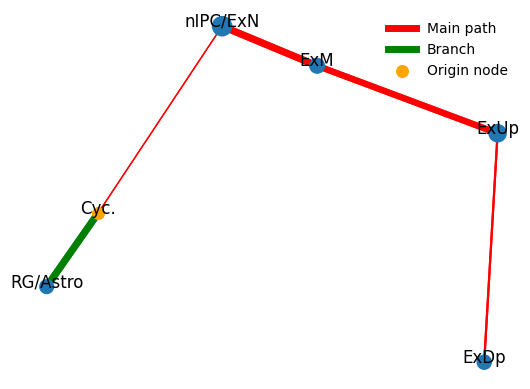


main path: ['Cyc.', 'nIPC/ExN', 'ExM', 'ExUp', 'ExDp']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: 6.923 
median: 6.930 
lower quantile: -25.288 
upper quantile: 36.449 
minimum: -315.824 
maximum: 275.577 
No. of positive scores: 254

branch_1: ['Cyc.', 'RG/Astro']


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1555614471435547s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    1.2s finished


mean: 1.129 
median: -1.844 
lower quantile: -16.833 
upper quantile: 15.580 
minimum: -214.026 
maximum: 201.591 
No. of positive scores: 201

'path_dict' added to adata.uns
'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [00:26<00:00,  3.82it/s, cos_s=0.96, cos_u=0.723, mse_s=0.004, mse_u=0.005]


computing velocity graph (using 20/20 cores)


  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


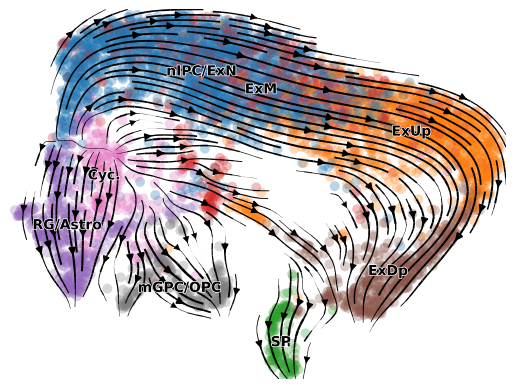

TIVelo:
 CBDir: 0.3562 ICVCoh: 0.9647 
 CBDir2: 0.2753 ICVCoh2: 0.9002 
 TransProbs: 0.2197 VeloCoh: 0.0530


In [4]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1,
                tree_gene=tree_gene, show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, 
                loss_fun=loss_fun, only_s=only_s, alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, 
                n_epochs=n_epochs, velocity_key="velocity", adjust_DTI=adjust_DTI, show_DTI=show_DTI, 
                cluster_edges=cluster_edges, measure_performance=measure_performance)

## Run MultiVelo.

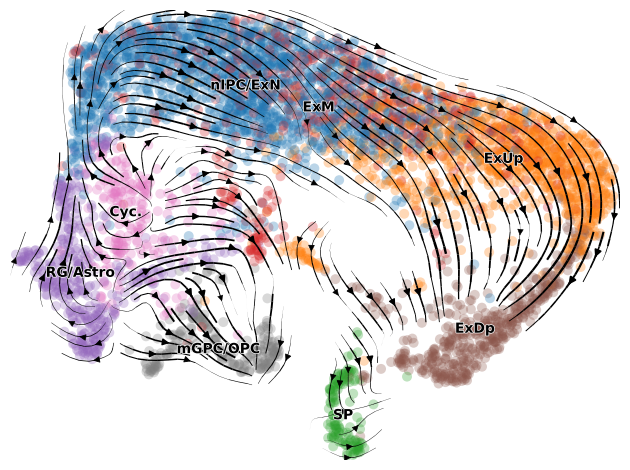

multivelo:
 CBDir: 0.5517 ICVCoh: 0.9286 
 CBDir2: 0.0901 ICVCoh2: 0.7792 
 TransProbs: 0.2301 VeloCoh: 0.0341


In [5]:
adata_multivelo = run_baseline(adata, "multivelo", data_name, group_key, emb_key, cluster_edges, 
                               adata_atac=adata_atac, show_fig=True, measure_performance=True)